In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [2]:
for dirname, _, filenames in os.walk('flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

flowers\daisy\100080576_f52e8ee070_n.jpg
flowers\daisy\10140303196_b88d3d6cec.jpg
flowers\daisy\10172379554_b296050f82_n.jpg
flowers\daisy\10172567486_2748826a8b.jpg
flowers\daisy\10172636503_21bededa75_n.jpg
flowers\daisy\102841525_bd6628ae3c.jpg
flowers\daisy\10300722094_28fa978807_n.jpg
flowers\daisy\1031799732_e7f4008c03.jpg
flowers\daisy\10391248763_1d16681106_n.jpg
flowers\daisy\10437754174_22ec990b77_m.jpg
flowers\daisy\10437770546_8bb6f7bdd3_m.jpg
flowers\daisy\10437929963_bc13eebe0c.jpg
flowers\daisy\10466290366_cc72e33532.jpg
flowers\daisy\10466558316_a7198b87e2.jpg
flowers\daisy\10555749515_13a12a026e.jpg
flowers\daisy\10555815624_dc211569b0.jpg
flowers\daisy\10555826524_423eb8bf71_n.jpg
flowers\daisy\10559679065_50d2b16f6d.jpg
flowers\daisy\105806915_a9c13e2106_n.jpg
flowers\daisy\10712722853_5632165b04.jpg
flowers\daisy\107592979_aaa9cdfe78_m.jpg
flowers\daisy\10770585085_4742b9dac3_n.jpg
flowers\daisy\10841136265_af473efc60.jpg
flowers\daisy\10993710036_2033222c91.jpg
flo

In [3]:
X = []
Y = []

flower_daisy = os.listdir('flowers/daisy')
flower_dandelion = os.listdir('flowers/dandelion')
flower_rose = os.listdir('flowers/rose')
flower_sunflower = os.listdir('flowers/sunflower')
flower_tulip = os.listdir('flowers/tulip')

In [4]:
print('Number of daisy images: ', len(flower_daisy))
print('Number of dandelion images: ', len(flower_dandelion))
print('Number of rose images: ', len(flower_rose))
print('Number of sunflower images: ', len(flower_sunflower))
print('Number of tulip images: ', len(flower_tulip))

Number of daisy images:  764
Number of dandelion images:  1052
Number of rose images:  784
Number of sunflower images:  733
Number of tulip images:  984


In [5]:
def assign_label(img, flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))
        
        X.append(np.array(img))
        Y.append(str(label))

In [7]:
make_train_data('Daisy', 'flowers/daisy')
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 515.52it/s]

764


In [8]:
make_train_data('Dandelion', 'flowers/dandelion')
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 481.69it/s]

1816


In [9]:
make_train_data('Rose', 'flowers/rose')
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 484.21it/s]

2600


In [10]:
make_train_data('Sunflower', 'flowers/sunflower')
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 400.80it/s]

3333


In [11]:
make_train_data('Tulip', 'flowers/tulip')
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 453.74it/s]

4317


In [12]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255

In [13]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 150, 150, 3)
x_test shape:  (864, 150, 150, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


In [14]:
# The MLP should have at least 2
# hidden layers, and you can choose the number of neurons in each layer. You should use cross-
# entropy loss function, stochastic gradient descent optimization algorithm with a learning rate of
# 0.01.

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                    activation ='relu', input_shape = (150,150,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                    activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                    activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                    activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

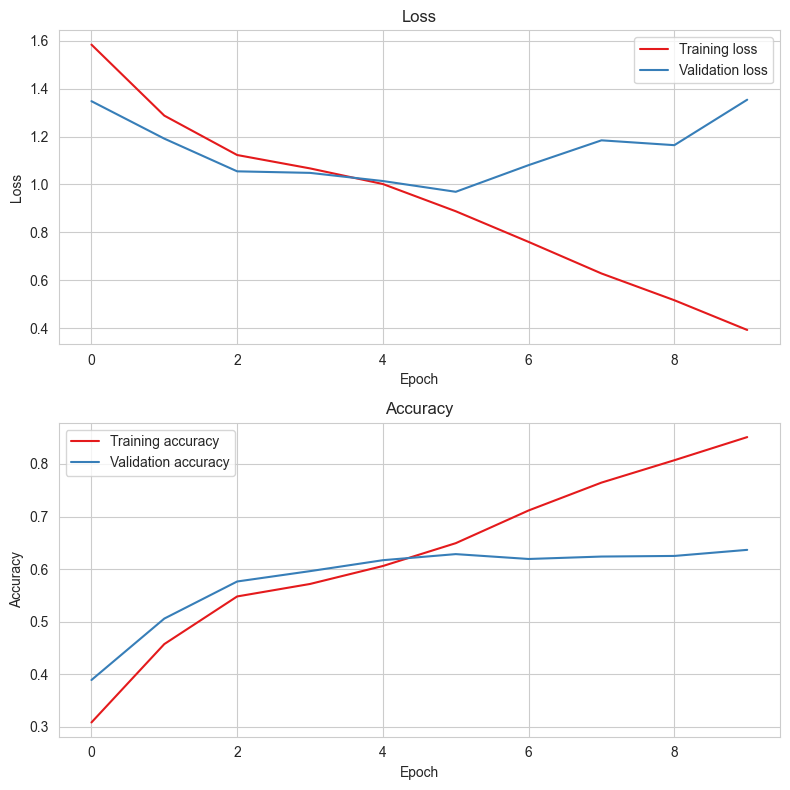

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set1')

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], ax=ax[0], label='Training loss')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], ax=ax[0], label='Validation loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], ax=ax[1], label='Training accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], ax=ax[1], label='Validation accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()



27/27 [==============================] - 10s 335ms/step


Text(70.72222222222221, 0.5, 'True Label')

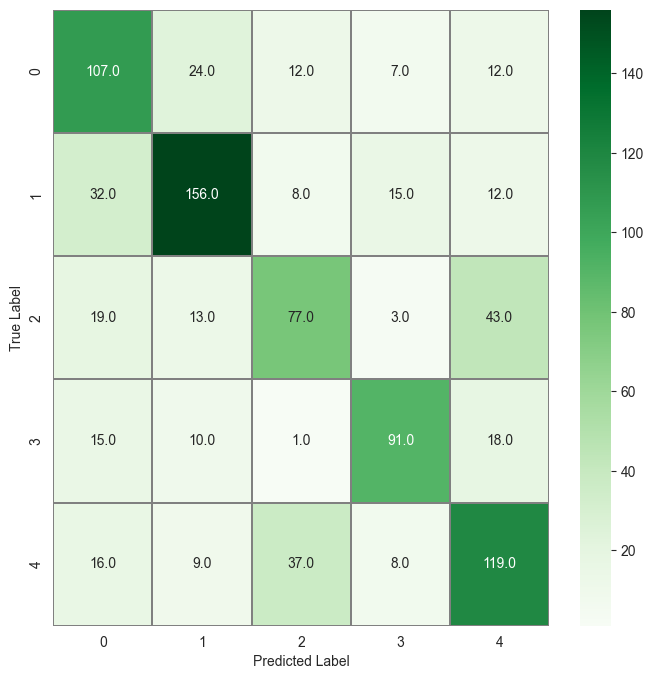

In [16]:

# Plot the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
7/7 [==============================] - 12s 1s/step - loss: 1.3539 - accuracy: 0.6366
test loss, test acc: [1.3539258241653442, 0.6365740895271301]


              precision    recall  f1-score   support

           0       0.57      0.66      0.61       162
           1       0.74      0.70      0.72       223
           2       0.57      0.50      0.53       155
           3       0.73      0.67      0.70       135
           4       0.58      0.63      0.61       189

    accuracy                           0.64       864
   macro avg       0.64      0.63      0.63       864
weighted avg       0.64      0.64      0.64       864

27/27 [==============================] - 9s 313ms/step
Evaluate on test data
7/7 [==============================] - 9s 1s/step - loss: 1.3539 - accuracy: 0.6366
test loss, test acc: [1.3539258241653442, 0.6365740895271301]


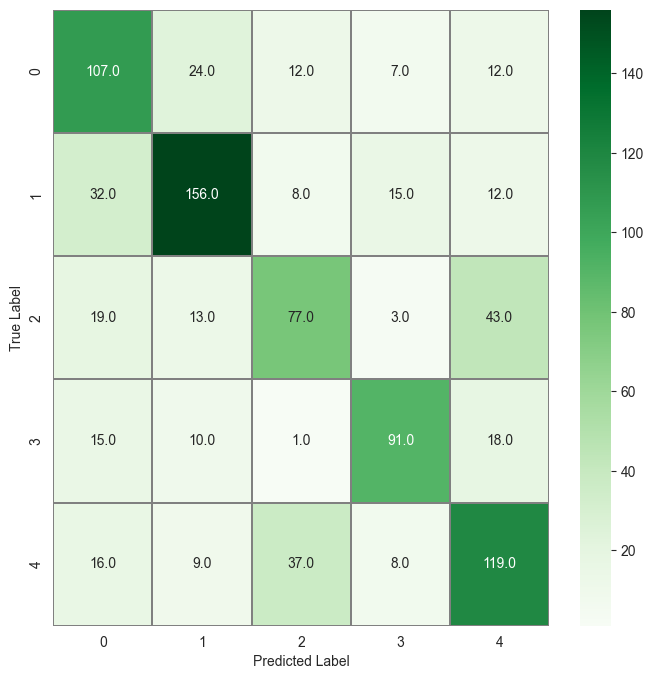

In [18]:
# print classification report
print(classification_report(y_true, y_pred_classes))

# Plot the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)



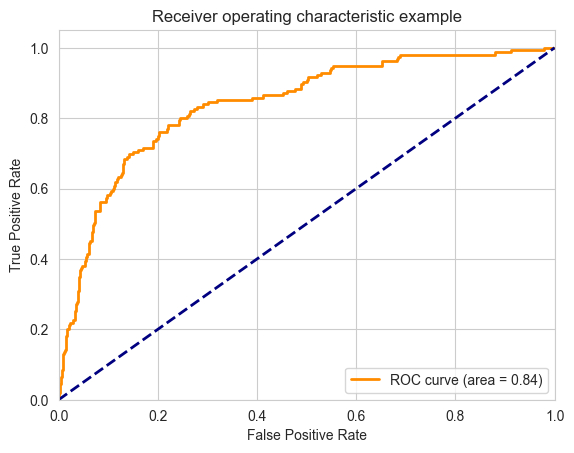

In [21]:
# plot roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
     
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

 


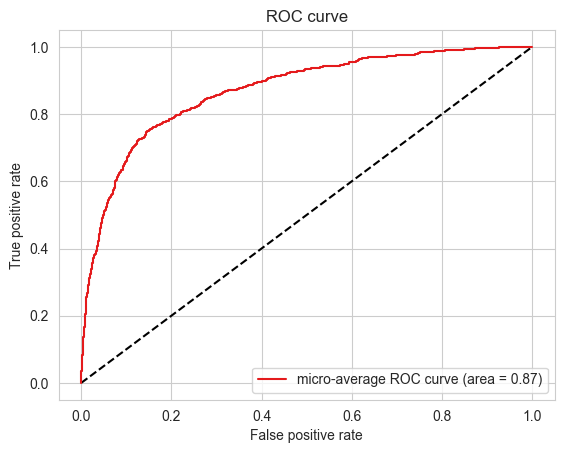

In [29]:
# plot auc curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
                                        ''.format(roc_auc["micro"]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()